In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [166]:
srednice =np.loadtxt("srednice.dat") / 1000 # oryginalne mm; w metrach
print(srednice)
roztarowanie = 250 / 1000 / 1000 # oryginalnie mikro m; w metrach
print(roztarowanie)
srednice -= roztarowanie
# print("srednice", srednice)
masa = (3 - 4.5/1000 + 0.7/1000) / 1000 # kg
masa /= 10 # było tyle kulek
m = masa
print("masa", masa, "masa g", masa*1000)
g = 9.81
r = srednice.mean()/2
print("r", r)
L = 1 # długość rury w metrach
R = 40 / 2 / 1000 # promień rury w metrach
print("R", R)
dR = 0.3 / 2 / 1000 #niepewność promienia rury w metrach

def eta(gestosc, czas):
    return (masa-4/3*np.pi*r**3*gestosc)*g*czas/(6 * np.pi * r*L*(1+2.4*r/R))

[ 0.00375  0.00374  0.00373  0.00374  0.00376  0.00373  0.0037   0.00372
  0.00375  0.00372]
0.00025
masa 0.00029962 masa g 0.29962
r 0.001742
R 0.02


In [16]:
czas_w_oleju = np.loadtxt("czas_olej.dat") # sekundy
gestosc_olej = 0.867 #g/cm^3
gestosc_olej *= 1000 # kg/m^3

eta_olej = eta(gestosc_olej, czas_w_oleju)

print ("eta", eta_olej.mean())
eta_olej.mean()/0.065, eta_olej.mean()/0.319

eta 0.576866940735


(8.8748760113041651, 1.8083603157829804)

In [30]:
suma_olej = ((eta_olej-eta_olej.mean())**2).sum()
N_olej = eta_olej.size
STDEVS_olej = (suma_olej/N_olej/(N_olej-1))**(1/2)
print ("eta", eta_olej.mean(), STDEVS_olej)

eta 0.576866940735 0.00271404445517


In [17]:
czas_w_glicerynie = np.loadtxt("czas_gliceryna.dat") # sekundy
gestosc_gliceryna = 1.261 #g/cm^3
gestosc_gliceryna *= 1000 # kg/m^3

eta_gliceryna = eta(gestosc_gliceryna, czas_w_glicerynie)
print ("eta", eta_gliceryna.mean())
eta_gliceryna.mean()/1.2

eta 1.00202758765


0.83502298970966116

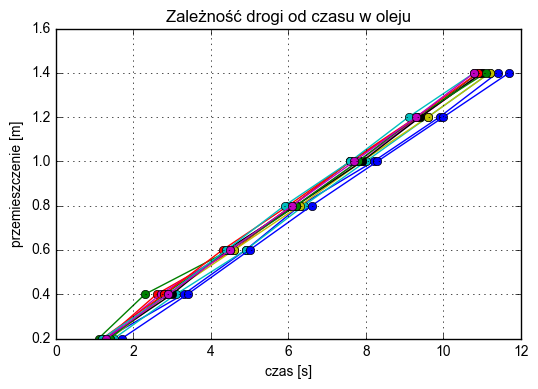

a: 0.122599289642 ,niepewnosc a: 0.00164579282033
a: 0.1226 +- 0.0016


In [139]:
czas_interwaly_olej = np.loadtxt("czas_interwaly_olej.dat")
czas_interwaly_olej[:, 0]
kumulatywnie_olej = czas_interwaly_olej.cumsum(axis=1)
x = np.arange(1, 8)*0.2
import matplotlib
matplotlib.rc('font', family='Arial')
par_o_s = 0
d_par_o_s = 0
for t in kumulatywnie_olej:
    plt.plot(t, x, "o-", label="test")
    parametry_olej, kowariancja_olej = np.polyfit(t, x, 1, cov=True)
    par_o_s += parametry_olej[0]
    d_par_o_s += kowariancja_olej[0,0]**(1/2)
a_o = par_o_s/kumulatywnie_olej.shape[0]
da_o = d_par_o_s/kumulatywnie_olej.shape[0]
plt.xlabel("czas [s]")
plt.ylabel("przemieszczenie [m]")
plt.title("Zależność drogi od czasu w oleju")
plt.grid()
plt.savefig('wykres oleju.png')
plt.show()
print('a:', a_o, ',niepewnosc a:', da_o)
print('a: {:.4f} +- {:.4f} m/s'.format(a_o, da_o))

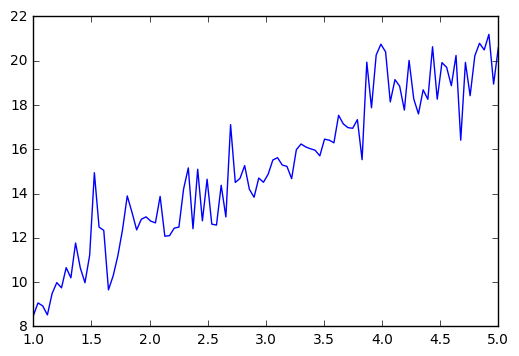

In [79]:
x = np.linspace(1, 5, 100)
y = np.random.normal(size=(100,)) + 7 + np.e * x
plt.plot(x, y)
plt.show()
parametry, kowariancje = np.polyfit(x, y, 1, cov=True)
a = parametry[0]
da = kowariancje[0,0]**0.5
a, da

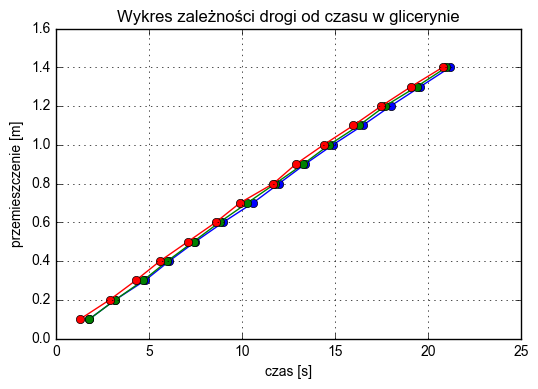

a 0.014 ,niepewnosc a: 0.000100512007855
a: 0.01448 +- 0.00010 m/s
69.0474165225


In [140]:
czas_interwaly_gliceryna = np.loadtxt("czas_interwaly_gliceryna.dat")
# czas_interwaly_olej[:, 0]
kumulatywnie_gliceryna = czas_interwaly_gliceryna.cumsum(axis=0)
x = np.arange(1, 15)*0.1
par_g_s = 0
d_par_g_s = 0
for t in kumulatywnie_gliceryna.T:
    plt.plot(t, x, 'o-')
    parametry_gliceryna, kowariancja_gliceryna = np.polyfit(t, x, 1, cov=True)
    par_g_s += parametry_gliceryna[0]
    d_par_g_s += kowariancja_gliceryna[0,0]**(1/2)
a_g = par_g_s/kumulatywnie_gliceryna.shape[0]
da_g = d_par_g_s/kumulatywnie_gliceryna.shape[0]
plt.xlabel("czas [s]")
plt.ylabel("przemieszczenie [m]")
plt.title("Wykres zależności drogi od czasu w glicerynie")
plt.grid()
plt.savefig('wykres C3H8(OH)3.png')
plt.show()
print('a', '{:.3f}'.format(a_g), ',niepewnosc a:', da_g)
print('a: {:.5f} +- {:.5f} m/s'.format(a_g, da_g))
print(1/a_g)

### mnożenie macierzowe a tablicowe
```
A
a b
c d

B
e f
g h


A@B
ae+gb ...
... ...

A*B
ae bf
gc hd
```

In [20]:
import sympy as sp
sp.init_printing()
v_gr, tau, t, v_0, tprime = sp.symbols('v_gr tau t v_0 tprime')
v = v_gr + (v_0 - v_gr)*sp.exp(-tprime/tau)
v

In [21]:
x = v.integrate((tprime, 0, t))
x

In [22]:
zmienne = m, r, rho, g, t, L, R = sp.symbols('m, r, rho, g, t, L, R')
eta_analitycznie = (m-sp.Rational(4,3)*sp.pi*r**3*rho)*g*t/(6 * sp.pi * r*L*(1+2.4*r/R))
for zmienna in zmienne:
    sp.pprint((zmienna, eta_analitycznie.diff(zmienna).simplify()))


⎛          R⋅g⋅t       ⎞
⎜m, ───────────────────⎟
⎝   6⋅π⋅L⋅r⋅(R + 2.4⋅r)⎠
⎛              ⎛                   3                       4  ⎞ ⎞
⎜   -1.0⋅R⋅g⋅t⋅⎝3.0⋅R⋅m + 8.0⋅π⋅R⋅r ⋅ρ + 14.4⋅m⋅r + 9.6⋅π⋅r ⋅ρ⎠ ⎟
⎜r, ────────────────────────────────────────────────────────────⎟
⎜                  2 ⎛      2                      2⎞           ⎟
⎝             π⋅L⋅r ⋅⎝18.0⋅R  + 86.4⋅R⋅r + 103.68⋅r ⎠           ⎠
⎛             2    ⎞
⎜     -2⋅R⋅g⋅r ⋅t  ⎟
⎜ρ, ───────────────⎟
⎝   9⋅L⋅(R + 2.4⋅r)⎠
⎛       ⎛           3  ⎞⎞
⎜   R⋅t⋅⎝3⋅m - 4⋅π⋅r ⋅ρ⎠⎟
⎜g, ────────────────────⎟
⎝   18⋅π⋅L⋅r⋅(R + 2.4⋅r)⎠
⎛       ⎛           3  ⎞⎞
⎜   R⋅g⋅⎝3⋅m - 4⋅π⋅r ⋅ρ⎠⎟
⎜t, ────────────────────⎟
⎝   18⋅π⋅L⋅r⋅(R + 2.4⋅r)⎠
⎛          ⎛           3  ⎞ ⎞
⎜   -R⋅g⋅t⋅⎝3⋅m - 4⋅π⋅r ⋅ρ⎠ ⎟
⎜L, ────────────────────────⎟
⎜          2                ⎟
⎝    18⋅π⋅L ⋅r⋅(R + 2.4⋅r)  ⎠
⎛                         ⎛           3  ⎞⎞
⎜   0.133333333333333⋅g⋅t⋅⎝3⋅m - 4⋅π⋅r ⋅ρ⎠⎟
⎜R, ──────────────────────────────────────⎟
⎜                    

In [152]:
czas_interwaly_gliceryna.T
np.savetxt('interwaly_C3H8(OH)3.dat', czas_interwaly_gliceryna.T, fmt='%.2f', delimiter='\t')

In [167]:
m

In [168]:
import sympy as sp
zmienne = m_symboliczne, r, rho, g, t, L, R = sp.symbols('m, r, rho, g, t, L, R')

wartosci = {m_symboliczne: m, r: 1, rho:1, g:9.81, t: 1, L:1, R:1, sp.pi:np.pi}
niepewnosci = {m_symboliczne: 1, r: 1, rho:1, g:9.81, t: 1, L:1, R:1, sp.pi:0}

eta_analitycznie = (m_symboliczne-sp.Rational(4,3)*sp.pi*r**3*rho)*g*t/(6 * sp.pi * r*L*(1+2.4*r/R))
sp.pprint(eta_analitycznie)

cala_delta_eta = 0.0
for zmienna in zmienne:
    pochodna = eta_analitycznie.diff(zmienna).simplify()
    sp.pprint((zmienna, pochodna))
    wklad_od_obecnej_zmiennej = (pochodna.subs(wartosci)*niepewnosci[zmienna])**2
    cala_delta_eta += wklad_od_obecnej_zmiennej
cala_delta_eta **= 0.5
print(cala_delta_eta)

     ⎛         3  ⎞
     ⎜    4⋅π⋅r ⋅ρ⎟
 g⋅t⋅⎜m - ────────⎟
     ⎝       3    ⎠
───────────────────
        ⎛    2.4⋅r⎞
6⋅π⋅L⋅r⋅⎜1 + ─────⎟
        ⎝      R  ⎠
⎛          R⋅g⋅t       ⎞
⎜m, ───────────────────⎟
⎝   6⋅π⋅L⋅r⋅(R + 2.4⋅r)⎠
⎛              ⎛                   3                       4  ⎞ ⎞
⎜   -1.0⋅R⋅g⋅t⋅⎝3.0⋅R⋅m + 8.0⋅π⋅R⋅r ⋅ρ + 14.4⋅m⋅r + 9.6⋅π⋅r ⋅ρ⎠ ⎟
⎜r, ────────────────────────────────────────────────────────────⎟
⎜                  2 ⎛      2                      2⎞           ⎟
⎝             π⋅L⋅r ⋅⎝18.0⋅R  + 86.4⋅R⋅r + 103.68⋅r ⎠           ⎠
⎛             2    ⎞
⎜     -2⋅R⋅g⋅r ⋅t  ⎟
⎜ρ, ───────────────⎟
⎝   9⋅L⋅(R + 2.4⋅r)⎠
⎛       ⎛           3  ⎞⎞
⎜   R⋅t⋅⎝3⋅m - 4⋅π⋅r ⋅ρ⎠⎟
⎜g, ────────────────────⎟
⎝   18⋅π⋅L⋅r⋅(R + 2.4⋅r)⎠
⎛       ⎛           3  ⎞⎞
⎜   R⋅g⋅⎝3⋅m - 4⋅π⋅r ⋅ρ⎠⎟
⎜t, ────────────────────⎟
⎝   18⋅π⋅L⋅r⋅(R + 2.4⋅r)⎠
⎛          ⎛           3  ⎞ ⎞
⎜   -R⋅g⋅t⋅⎝3⋅m - 4⋅π⋅r ⋅ρ⎠ ⎟
⎜L, ────────────────────────⎟
⎜          2                ⎟
⎝    18⋅π⋅L ⋅r⋅(R + 2.4

In [158]:
słownik = {"wasiu":"Marek", "murba":"Michał", "jura":"yhyhyhy", 0:"TO NIE JEST CZŁOWIEK NO LOOOOL"}
słownik[0]

'TO NIE JEST CZŁOWIEK NO LOOOOL'

In [162]:
słownik['dygas'] = "Józek"
słownik['problematyczne'] = "Marek"
słownik

{0: 'TO NIE JEST CZŁOWIEK NO LOOOOL',
 'problematyczne': 'Marek',
 'jura': 'yhyhyhy',
 'wasiu': 'Marek',
 'murba': 'Michał',
 'dygas': 'Józek'}